<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/E533_DLS_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

In [12]:
# Referred from tutorials https://www.tensorflow.org/tutorials/quickstart/beginner
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print("Training Data:",x_train.shape)
print("Training Label Data:",y_train.shape)
print("Testing Data:",x_test.shape)
print("Testing Label Data:",y_test.shape)

Training Data: (60000, 28, 28)
Training Label Data: (60000,)
Testing Data: (10000, 28, 28)
Testing Label Data: (10000,)


In [36]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(10)
])

In [37]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 1024)              803840    
                                                                 
 dense_39 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_40 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_41 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_42 (Dense)            (None, 10)                10250     
                                                                 
Total params: 3,962,890
Trainable params: 3,962,890
N

In [38]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-24.081867 ,  38.52824  ,  17.87317  ,  -1.6701584, -34.114605 ,
        -47.558186 ,  28.321388 ,   2.378645 ,  10.651752 ,  -5.494565 ]],
      dtype=float32)

In [39]:
tf.nn.softmax(predictions).numpy()

array([[6.4381310e-28, 9.9996305e-01, 1.0705361e-09, 3.4837042e-18,
        2.8287666e-32, 4.1032149e-38, 3.6915135e-05, 1.9971622e-16,
        7.8231052e-13, 7.6054165e-20]], dtype=float32)

In [40]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")

In [41]:
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=128)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 2.6161 - acc: 0.9022
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1161 - acc: 0.9638
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0883 - acc: 0.9735
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0810 - acc: 0.9754
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0723 - acc: 0.9785
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0659 - acc: 0.9805
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0708 - acc: 0.9797
Epoch 8/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0573 - acc: 0.9831
Epoch 9/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0543 - acc: 0.9845
Epoch 10/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0543 - acc: 0.9845
Epoch 11/50
469/469 [============================

In [42]:
history.history

{'loss': [2.6161437034606934,
  0.11605745553970337,
  0.08831074088811874,
  0.08097068220376968,
  0.07229015976190567,
  0.06591670215129852,
  0.07081177085638046,
  0.05730738118290901,
  0.0543314628303051,
  0.05429691821336746,
  0.056102462112903595,
  0.043921757489442825,
  0.04599126800894737,
  0.04968707635998726,
  0.040532372891902924,
  0.04202229157090187,
  0.05237483233213425,
  0.048211466521024704,
  0.04825753718614578,
  0.036577485501766205,
  0.0436117947101593,
  0.026042144745588303,
  0.026892583817243576,
  0.03847084939479828,
  0.03365126997232437,
  0.03692740574479103,
  0.03705816715955734,
  0.026347355917096138,
  0.038858357816934586,
  0.026480942964553833,
  0.022428199648857117,
  0.01864204742014408,
  0.03257453441619873,
  0.02615515887737274,
  0.016751611605286598,
  0.030209708958864212,
  0.017079604789614677,
  0.021623525768518448,
  0.017348984256386757,
  0.030314944684505463,
  0.02094881795346737,
  0.015699980780482292,
  0.0266940

In [47]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2070 - acc: 0.9772


In [48]:
print(test_acc)

0.9771999716758728


In [64]:
# evaluate the model
y_pred =  tf.nn.softmax(model.predict(x_test))[:1000]

In [70]:
y_pred = y_pred.numpy().argmax(axis=1)

In [71]:
y_pred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [96]:
result = np.where(y_pred == 8)
print(result[0].shape)

(82,)


In [103]:
confusion_matrix(y_test[:1000], y_pred)

array([[ 85,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 125,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   1, 113,   0,   0,   0,   0,   1,   0,   1],
       [  0,   0,   0, 106,   0,   1,   0,   0,   0,   0],
       [  0,   0,   1,   0, 107,   0,   0,   0,   0,   2],
       [  0,   0,   0,   1,   0,  86,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,  86,   0,   0,   0],
       [  0,   0,   1,   1,   0,   0,   0,  96,   0,   1],
       [  0,   0,   1,   1,   0,   4,   0,   1,  81,   1],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,  93]])

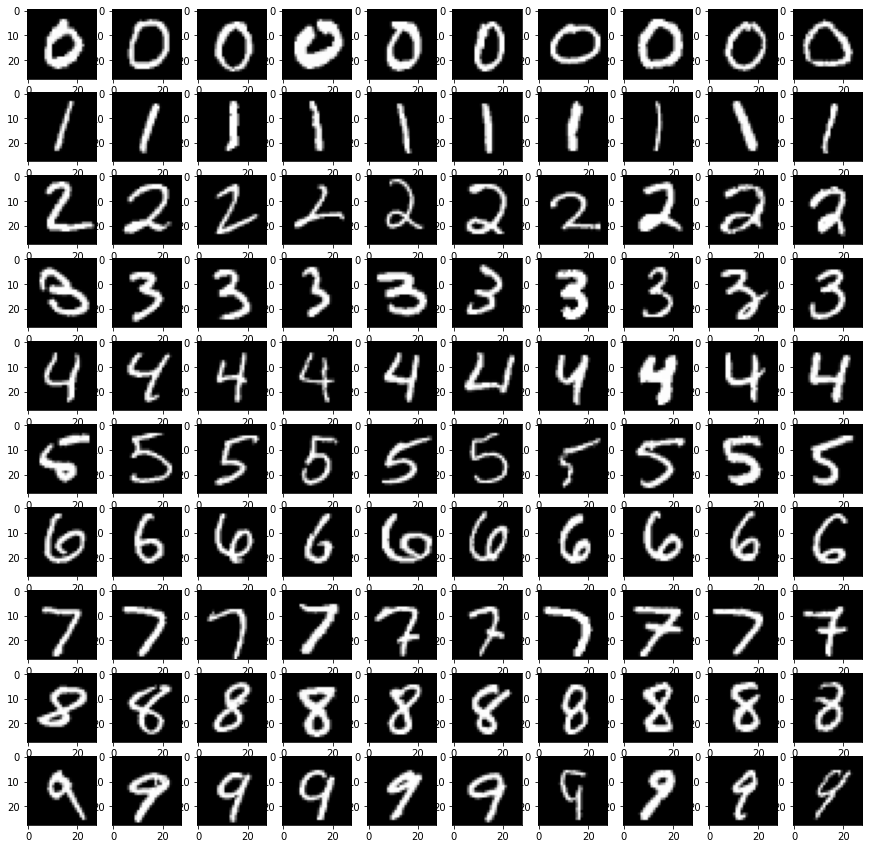

In [99]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):  
    result = np.where(y_pred == i)
    for j in range(10):
      axs[i,j].imshow(x_test[result[0][:10][j]], cmap=plt.get_cmap('gray'))
plt.show()

#1.5

In [107]:
from tensorflow.contrib.tensorboard.plugins import projector
import os

ModuleNotFoundError: ignored

In [ ]:

sample = np.random.choice(a = np.array(range(0,len(x_test))),size=1000,replace=False)

test_imgs = x_test[sample]
test_labels = y_test[sample]



LOG_DIR = 'logs'
metadata = os.path.join(LOG_DIR, 'metadata.tsv')

#Applying TSNE transformation
two_dim_manifold = TSNE(n_components=2, n_iter=150).fit_transform(test_imgs.reshape([1000,28*28]))
df = pd.DataFrame(two_dim_manifold)
df.columns = ["dm1","dm2"]
df["lbls"] = test_labels.numpy()



In [ ]:
%tensorboard — logdir LOG_DIR